In [1]:
import pandas as pd

### 1. Top-10 entities by cosine smilarity scores (Set 2) (based on the annotated sample)

In [2]:
wd_ann_01 = pd.read_csv("samples/ann_wd_en_01.csv").drop(columns=['text_1','text_2', 'text_3', 'text_4', 'text_5','cannot_decide'])
wd_ann_03 = pd.read_csv("samples/ann_wd_en_03.csv").drop(columns=['text_1','text_2', 'text_3', 'text_4', 'text_5','cannot_decide'])

In [3]:
# both annotators agreed
cs_overlap = wd_ann_01.merge(wd_ann_03,how='inner', on=['entity_id','check'])

In [5]:
cs_overlap = cs_overlap.drop(columns=['term_y'])

In [6]:
cs_overlap = cs_overlap.rename(columns={'term_x':'term'})

In [7]:
# proportion of relevant entities in top-10 by CS (~precision)
cs_proportion = round(len(cs_overlap.loc[cs_overlap['check']==True])/len(cs_overlap), 3)

In [8]:
cs_proportion

0.771

### 2. Common token overlap: how does it compare to cosine similarity?

– The token overlap score (N overlapping tokens) was calculated between 2 bag of words: (1) literals of an entity and (2) the target term's background information taken from related matches; for EN wikidata, there are 3 sources of related matches: PWN, AAT, and WD itself; if the score was at least 1 (there's at least 1 overlapping token in any of the background information sources), then the entity counts as relevant (disambiguated)

In [9]:
wd_token_overlap = pd.read_csv("cs/common_tokens_wd_en.csv")

In [10]:
wd_token_overlap = wd_token_overlap.rename(columns={'target_term':'term'})

In [11]:
# take only terms, which were annotated (in cs_proportion)
wd_token_overlap = wd_token_overlap.merge(cs_overlap,how='inner', on=['term','entity_id'],left_index=True)

In [12]:
# proportion of relevant entities in the set with common token overlap (~precision)
token_overlap_proportion = round(len(wd_token_overlap.loc[wd_token_overlap['match']==True])/len(wd_token_overlap), 3)

In [13]:
token_overlap_proportion

0.677

In [14]:
# there are fewer true positives in the set based on common token overlap score than in the set based on cosine similarity score
cs_proportion > token_overlap_proportion

True

### Apart from CS with background info based on literals of related matches (rm), we experimented (1) adding text from the Words Matter KG describing terms (TF-IDF weighted) to rm (rm_wm) and (2) taking only the Words Matter KG text as background info (wm)
Generally, WM text lowered the CS scores (see for example, '/cs/top_10_wm_wikidata_en.csv').

We took 3 (rm, rm_wm, wm) top-10 lists of entities by CS scores grouped by lemmas and checked how many entities from Set 1 (related matches) were present in these lists (intuitively, all related matches should be included in top-10 based on CS score with the rm background info). See results in the Table below. It shows that for Dutch, indeed, all related matches were included (Lemmas, top_10_lemmas_cs_rm, suffix 'nl'); for English, all resources from PWN were included; from AAT, all but 1 were included; and for Wikidata, all but 8 were included. In the top-10 lists based on rm_wm and wm, these numbers are lower.

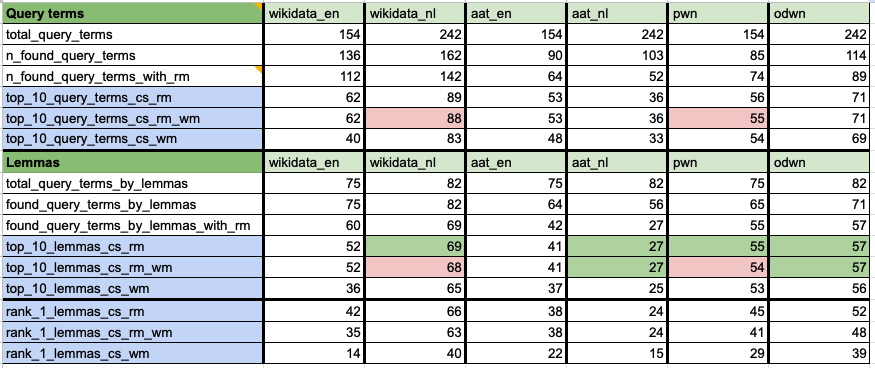